# Ideal Quantum Circuits: Bell and GHZ States

## Objective
This notebook constructs and analyzes ideal (noise-free) quantum circuits,
specifically the Bell state and GHZ state, using Qiskit.

The goal is to understand the expected quantum behavior before introducing
realistic noise and hardware effects in later experiments.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator


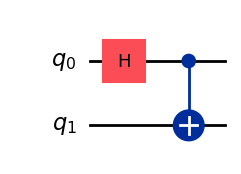

In [2]:
from qiskit import QuantumCircuit

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

bell.draw("mpl")


# Ideal Bell State Preparation (|Φ⁺⟩)

In this experiment, we construct the maximally entangled two-qubit Bell state

\[
|\Phi^+\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
\]

using a Hadamard gate followed by a CNOT gate.  
This serves as a baseline for later comparison against noisy and hardware-executed circuits.


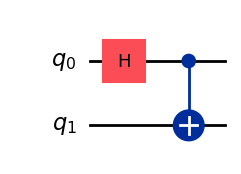

In [3]:
from qiskit import QuantumCircuit

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0, 1)

bell.draw("mpl")


In [4]:
from qiskit.quantum_info import Statevector
import numpy as np

psi = Statevector.from_instruction(bell)
psi


Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [5]:
# Analytical Bell state |Φ+>
phi_plus = np.array([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])

# Numerical state from Qiskit
numerical = psi.data

# Fidelity
fidelity = np.abs(np.vdot(phi_plus, numerical))**2
fidelity


np.float64(0.9999999999999996)

In [6]:
from qiskit_aer import AerSimulator
from qiskit import transpile

sim = AerSimulator()

meas_circ = bell.copy()
meas_circ.measure_all()

compiled = transpile(meas_circ, sim)
result = sim.run(compiled, shots=4096).result()

counts = result.get_counts()
counts


{'11': 2089, '00': 2007}

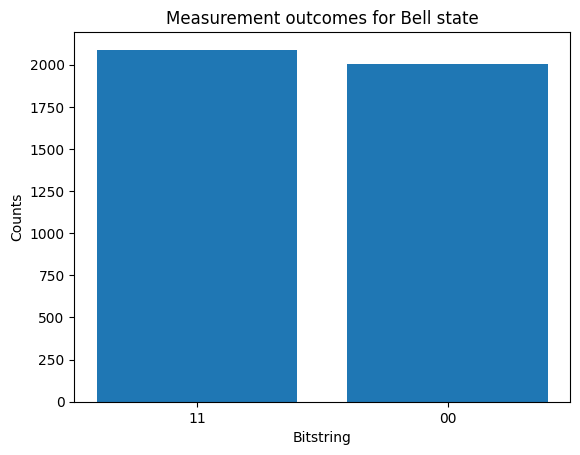

In [7]:
import matplotlib.pyplot as plt

plt.bar(counts.keys(), counts.values())
plt.xlabel("Bitstring")
plt.ylabel("Counts")
plt.title("Measurement outcomes for Bell state")
plt.show()


### Discussion

The ideal Bell state was prepared and verified using statevector simulation and measurement statistics.
The numerical fidelity with the analytical target state is unity up to floating-point precision.
Finite-shot measurements exhibit the expected binomial fluctuations around the ideal 50–50 probability
distribution, confirming correct state preparation and measurement behavior.
This experiment establishes a clean baseline for subsequent noise and hardware-aware studies.
